### Libraries and dataset 

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
import numpy as np

In [8]:
df = pd.read_csv("survey_lung_cancer.csv") 
df.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
48,F,70,1,1,2,2,2,2,2,2,2,1,2,2,2,YES
58,M,47,1,2,1,2,2,2,1,2,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
55,M,52,1,2,2,1,2,1,2,2,2,2,1,2,1,YES


### Quetions to answer
<ul>
    <li> Does drinking alcohol aggravate the consequences of smoking?</li>
    <li> Does smoking increase risk of lung cancer </li>
    <li> Are smokers more likely to have anxiety problems?</li> 
    <li> What are the symptoms of lung cancer in non-smoking individuals?</li>
    <li> Is there any difference in risk of lung cancers sex-wise?</li>
</ul>

### Cleaning the data

In [12]:
# Changing categorical data to discrete type 
df["LUNG_CANCER"] = np.where(df["LUNG_CANCER"] == "YES",1,0)

In [17]:
df["GENDER"] = np.where(df["GENDER"] == "M",1,0) # 1 --> male, 0 --> female

In [19]:
# Subtracting 1 of the data to obtain binary format 
df[['SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
'SWALLOWING DIFFICULTY', 'CHEST PAIN']] =  df[['SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
'SWALLOWING DIFFICULTY', 'CHEST PAIN']] - 1

In [22]:
# Making sure data is of correct type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

### EDA 

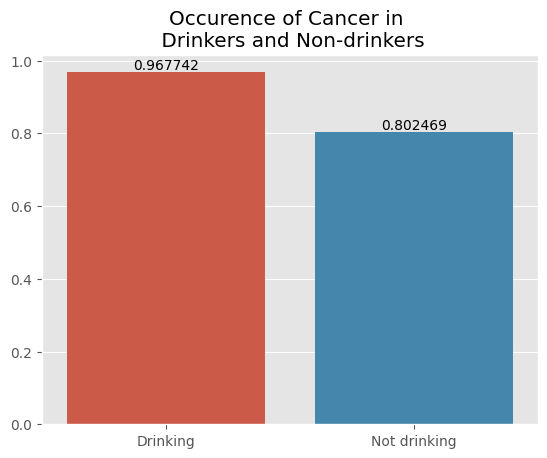

Number of individuals who drink: 93
Number of individuals who don't drink: 81


In [77]:
# Does drinking alcohol aggravate the consequences of smoking?
smoke = df.loc[(df["SMOKING"] == 1) & (df["ALCOHOL CONSUMING"] == 0)]
smoke_and_drink = smoking = df.loc[(df["SMOKING"] == 1) & (df["ALCOHOL CONSUMING"] == 1)]

ax = sns.barplot(x=['Drinking','Not drinking'],y=[smoke_and_drink['LUNG_CANCER'].mean(),smoke['LUNG_CANCER'].mean()],hue=['Drinking','Not drinking'])
plt.title("Occurence of Cancer in \n Drinkers and Non-drinkers")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()
print(f"Number of individuals who drink: {len(smoke_and_drink)}")
print(f"Number of individuals who don't drink: {len(smoke)}")

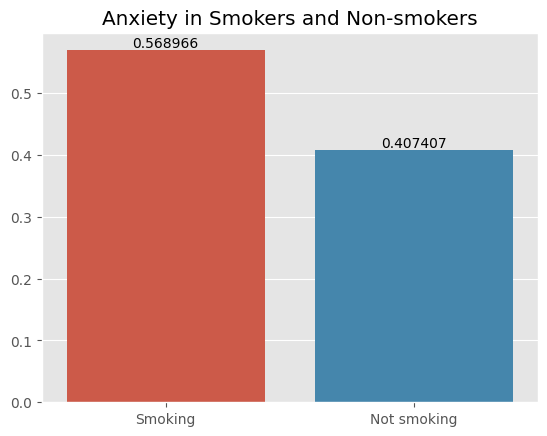

Number of smoking individuals:174
Number of non-smoking individuals:135


In [91]:
# Are smokers more likely to have anxiety problems?
smoke_anx = df[df['SMOKING'] == 1]
not_smoke_anx = df[df['SMOKING'] == 0]

ax = sns.barplot(x=['Smoking','Not smoking'],y=[smoke_anx['ANXIETY'].mean(),not_smoke_anx['ANXIETY'].mean()],hue=['Smoking','Not smoking'])
plt.title('Anxiety in Smokers and Non-smokers')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()
print(f"Number of smoking individuals:{len(smoke_anx)}")
print(f"Number of non-smoking individuals:{len(not_smoke_anx)}")